# Practical Session 2
## Biomedical Signals and Images
### ETRO: Deparment of Electronics and Informatics
### Vrije Universiteit Brussel

Evgenia Papavasileiou, Hamza Mekhzoum and Jef Vandemeulebroucke
<br>
Questions email or Teams: hamza.mekhzoum@vub.be

<font color=blue>Students names and IDs: Yajing Wang - 0609591 & Wouter Apts - 0606557</font> <Br>
<font color=blue>Academic Year </font>: 2023-2024

### File upload in google colab:
You can upload the files that are needed for this exercise in google drive and then access them with the following code:

from google.colab import drive <br>
drive.mount('/content/gdrive') <br>

In the following link you can find alternative ways and [examples](https://colab.research.google.com/notebooks/io.ipynb)

### 1. Signal Denoising
ECG signals are usually distorted by a combination of high and low frequency noise as well as artificats of the frequency of the power line. The low frequency noise may be removed by using a highpass filter and the noise of
high frequency may be removed by using a lowpass filter.
### 1.1 Power Line Interference
Alternating current in the United States and several other countries oscillates at a frequency of 60 Hz and in the EU around 50 Hz. Those oscillations often corrupt measurements and have to be subtracted. Filtering of power line interference is very meaningful in the measurement of biomedical events, particularly in the case of recording signals as weak as the ECG. This kind of disturbance can be modeled by a sinusoid with respective frequency and random phase. Generally, methods used to reduce this kind of disturbance can be divided into two groups: methods based in spectral domain and methods based in time domain. Typically, for reduction of the AC interference in a spectral domain, a fixed or adaptive notch filter is used, i.e. a band-stop filter with a narrow stopband, while in time domain a moving average filter is often used.

### Exercise 1: Removal of Power Line Interference

- In python, load the noisy ECG signal ECG_ex1.mat using function [scipy.io.loadmat](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html).
Use functions [numpy.ndarray.astype](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html) to convert the values to float and function [numpy.ndarray.flatten](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html) to collapse the array in one dimension.
- Plot the signal in time domain with a sampling frequency fs=200Hz.

- Calculate the fourier transform of the signal using the [fft](https://docs.scipy.org/doc/numpy/reference/routines.fft.html) function and plot its magnitude.
<Br>

Mounted at /content/gdrive


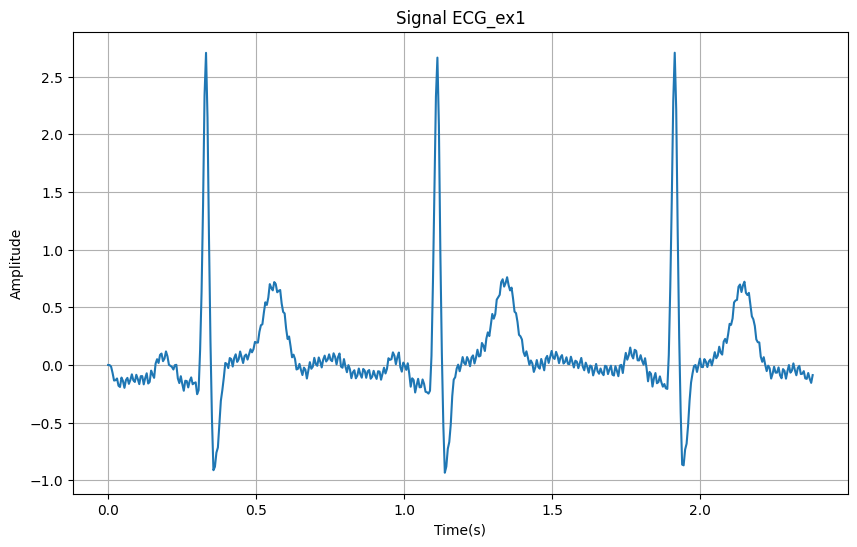

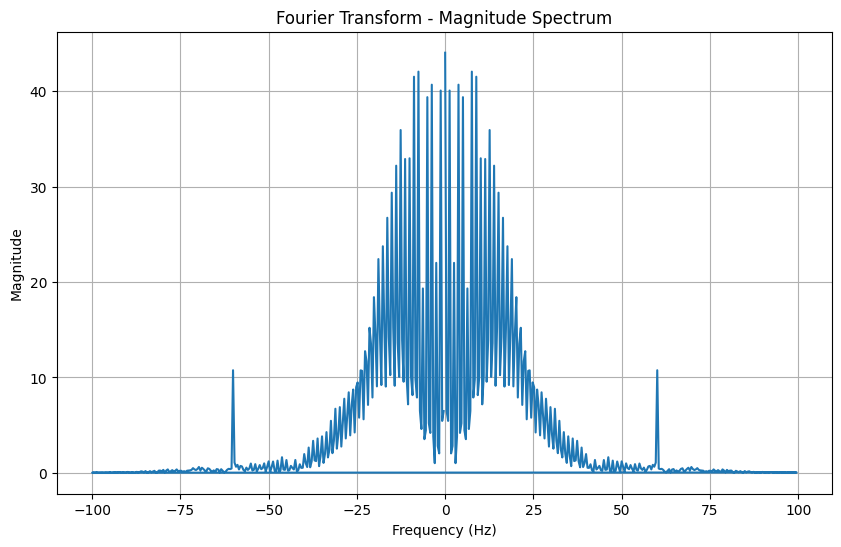

In [1]:
# Your code here:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from os.path import dirname, join as pjoin, exists
from google.colab import drive

# Load the noisy ECG signal ECG_ex1.mat
drive.mount('/content/gdrive')
path = pjoin('gdrive', 'MyDrive','ColabNotebooks')
filename = 'ECG_ex1.mat'
ECG_signal = scipy.io.loadmat(pjoin(path, filename), mdict=None, appendmat=True)


# Convert the values to float and collapse the array in one dimension
ECG_data = ECG_signal['ecg']
ECG_signal = ECG_data.astype(dtype=np.float64, order='K', casting='unsafe', subok=True, copy=True)
ECG_signal = ECG_signal.flatten()


# Plot the signal in time domain with a sampling frequency fs=200Hz
fs = 200
# Generate the X-axis of the ECG signal
ECG_signal_x = np.linspace(0,len(ECG_signal)/fs,len(ECG_signal))
plt.figure(figsize=(10, 6))
plt.plot(ECG_signal_x, ECG_signal)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Signal ECG_ex1')
plt.grid(True)
plt.show()


# Calculate the fourier transform of the signal
def create_fourier_transform(signal,fs):
  fourier_transform = np.fft.fft(signal)
  n = signal.size
  freq = np.fft.fftfreq(n, d=1/fs)
  return freq, fourier_transform

freq, fourier_transform = create_fourier_transform(ECG_signal, fs)


# Plot its magnitude
def plot_fft(freq, fourier_transform):
  plt.figure(figsize=(10, 6))
  plt.plot(freq, np.abs(fourier_transform))
  plt.title('Fourier Transform - Magnitude Spectrum')
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Magnitude')
  plt.grid(True)
  plt.show()

plot_fft(freq, fourier_transform)

Where do you see the frequency of the power line?<br>
<font color=blue>Your answer here:In the frequency spectrum, we can see that the frequency of the power line is approximately around 60hz, which is exactly the frequency of alternating current in some countries.</font>

- Design a notch filter that remove the frequency of the power line that you observed from the above spectrum. Use the following [scipy.signal.iirnotch](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirnotch.html) function with a Quality factor=30. Plot the magnitude of the filter.
- Filter the noisy ECG signal using the python function [filtfilt](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.filtfilt.html) and plot the filtered signal in the time domain.
- Calculate the Fourier transform of the ECG signal after filtering and plot its magnitude. <br>



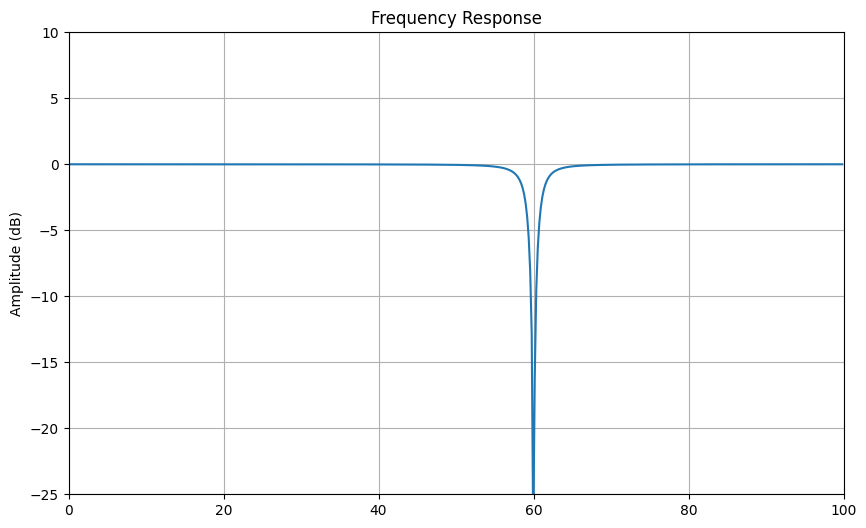

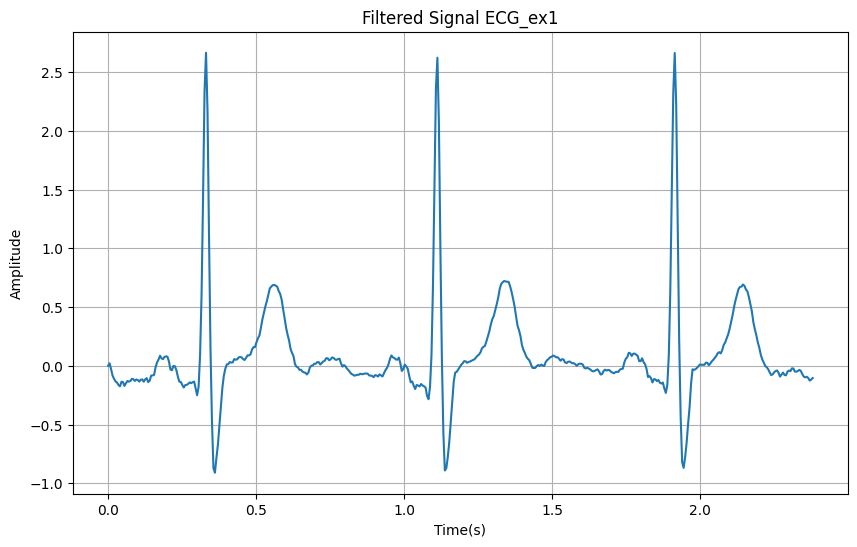

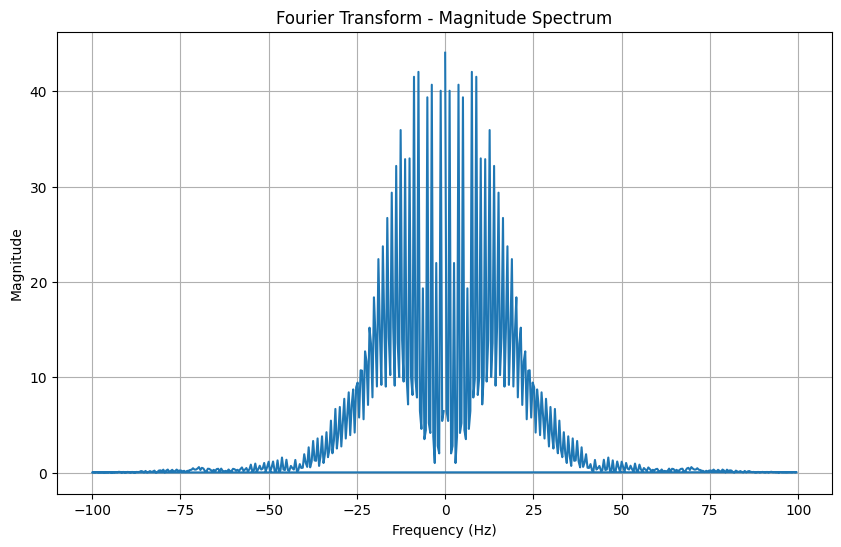

In [2]:
# Your code here:
from scipy import signal

fs = 200.0
f0 = 60.0
Q = 30.0

# Design notch filter
b, a = scipy.signal.iirnotch(f0, Q, fs)


# Frequency response
freq, h = signal.freqz(b, a, fs=fs)


# Plot the magnitude of the filter
plt.figure(figsize=(10, 6))
plt.plot(freq, 20*np.log10(abs(h)))
plt.title("Frequency Response")
plt.ylabel("Amplitude (dB)")
plt.xlim([0, 100])
plt.ylim([-25, 10])
plt.grid(True)
plt.show()


# Filter the noisy ECG signal
ECG_filtered = scipy.signal.filtfilt(b, a, ECG_signal, axis=-1, padtype='odd', padlen=None, method='pad', irlen=None)
ECG_filtered_x = np.linspace(0,len(ECG_filtered)/fs,len(ECG_filtered))


# Plot the filtered signal in the time domain
plt.figure(figsize=(10, 6))
plt.plot(ECG_filtered_x, ECG_filtered)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Filtered Signal ECG_ex1')
plt.grid(True)
plt.show()


#Calculate the Fourier transform of the ECG signal after filtering
freq, fourier_transform = create_fourier_transform(ECG_filtered, fs)


# Plot its magnitude
plot_fft(freq, fourier_transform)

What do you observe from the frequency spectrum of the filtered ECG signal?<br>
<font color=blue> Your answer here: we can observe that after filtering the signal, the peak at 60hz disappeared, indicating that the power line signal has been correctly filtered as noise. </font>

### 1.2 Digital Filters
Digital filters are systems that function on discrete signals to reduce or enhance specific aspects of the signal. In this exercise we will focus on filters that are used to improve the Signal to Noise ratio (SNR) of a signal, i.e. we will use filters to remove the noise from an ECG signal. A filter is defined by its transfer function in the z-domain or by its difference equation. The general transfer function for a linear, time-invariant, digital filter is defined as in (1)

\begin{equation*}
H(z) =\frac{b[0]+b[1]z^{-1}+b[2]z^{-2}+...+b[K]z^{-K}}{1+a[1]z^{-1}+a[2]z^{-2}+...+a[L]z^{-L}} =
\frac{ \sum_{k=0}^K b[k]z^{-k}} { \sum_{l=0}^L a[l]z^{-l}} \quad\quad\quad\quad\quad\quad\quad\quad \text{(1)}
\end{equation*}

The corresponding difference equation is then

\begin{equation*}
y(n) = \sum_{k=0}^K b[k]x[n-k] - \sum_{l=0}^L a[l]y[n-l]      \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\text{(2)}
\end{equation*}

A special case of (1), (2) occurs if we set $a_{l}$ = 0 for l = 1, ..., L. Then we get the system in equation (3) which is known as the weighted moving average of the input signal.

\begin{equation*}
\quad\quad\ y(n) = \sum_{k=0}^K b[k]x[n-k]   \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\text{(3)}
\end{equation*}

The coefficients b[k] are known as the <b>weights</b>, or filter coefficients, or the weighting function or impulse response and K is known as the <b>length</b> of the filter.

### Exercise 2: ECG signal denoising using moving average fiter
- Load the ECG signal ECG_ex2.mat as in previous exercise. Use functions [numpy.ndarray.astype](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html) to convert the values to float and function [numpy.ndarray.flatten](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html) to collapse the array in one dimension.
- Plot the signal in the time domain. Use sampling frequency fs = 1024Hz.
- Design a 3-points (K=3) and a 7-points (K=7) moving average filter. Each filter has equal weights that sum up to 1. Define your own generic python function which based on the number of points given (length of the filter K), calculates the filter kernel and applies it to your noisy signal based on looping through your signal to consider every window of size K.


      e.g def moving_average_filter(signal, K):

            .......
        
            return filtered_signal
        
- Plot three subgraphs the one under the other. The first plot should contain the original signal and the others the filtered signal after the application of each moving average filter (K=3 and K=7). Plot the filtered signals <b>on top</b> of the original signal.



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


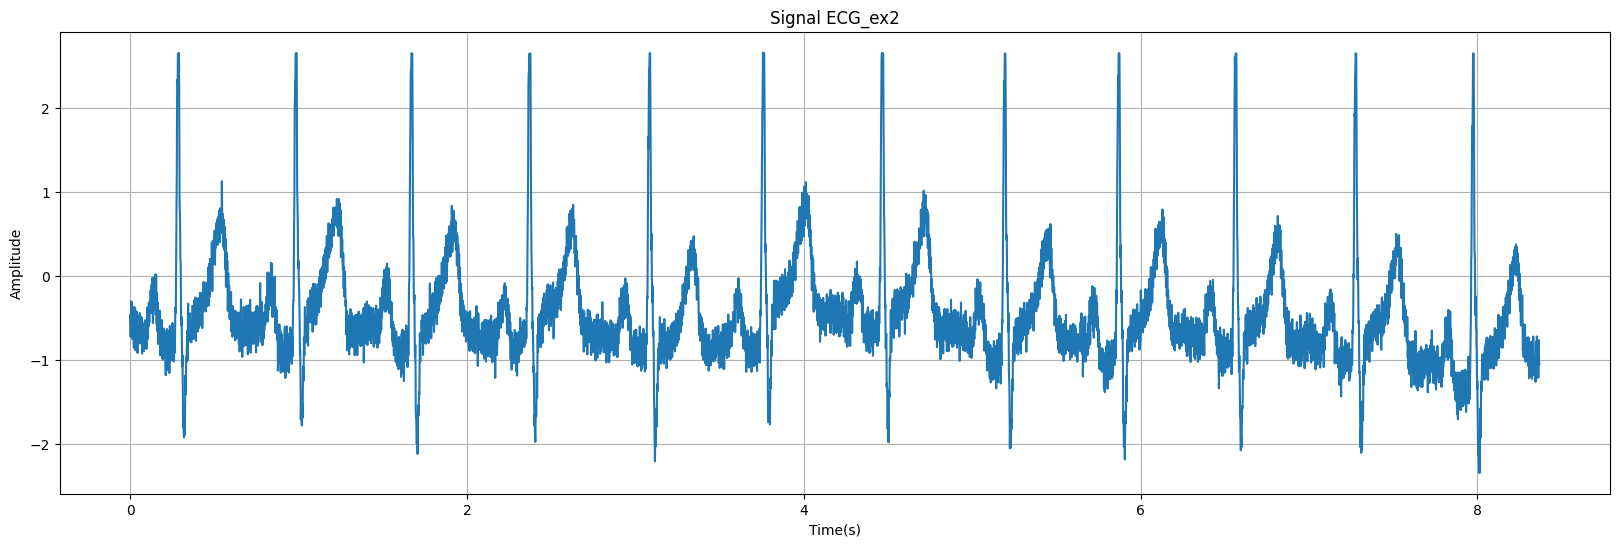

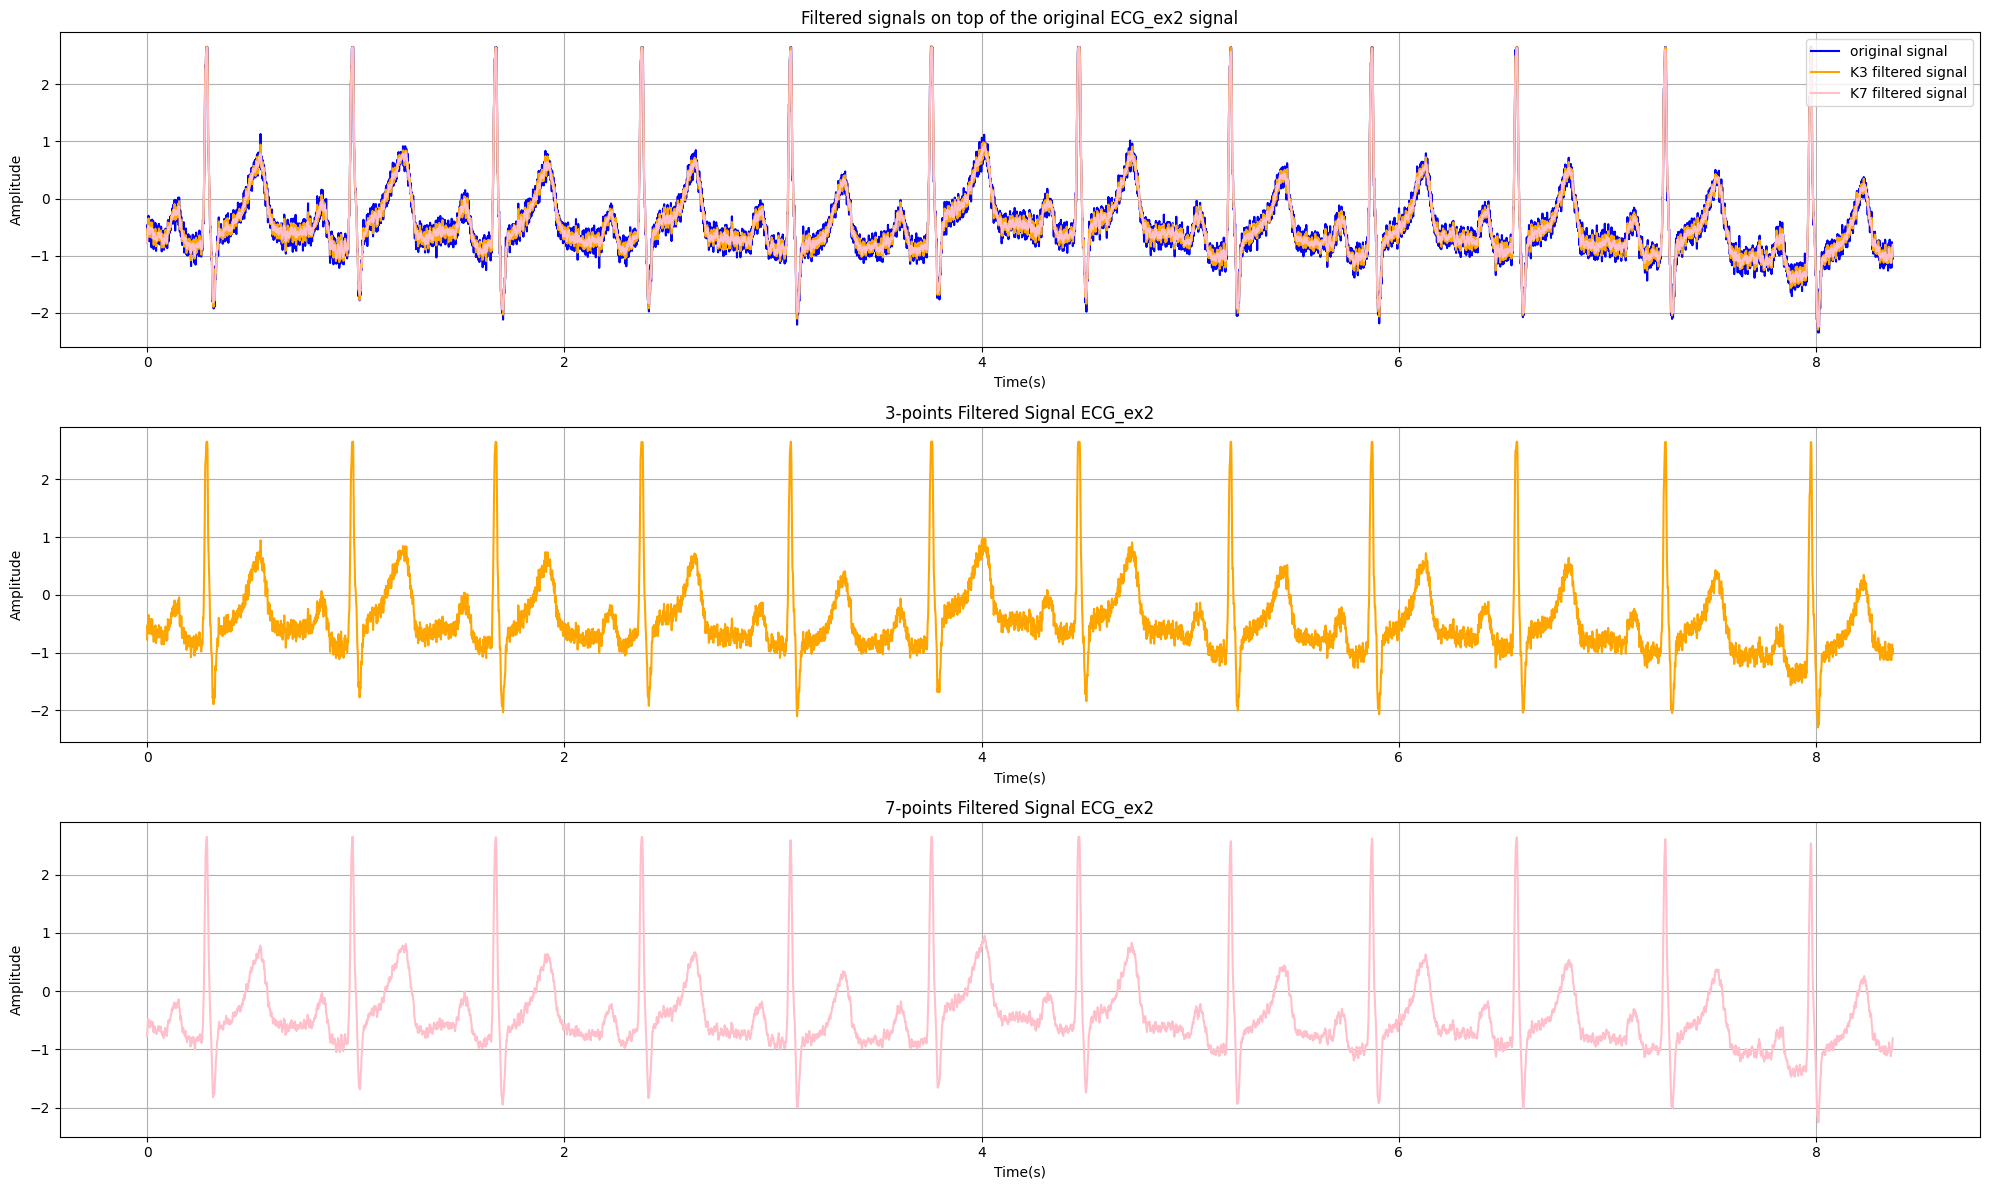

In [10]:
# Your code here:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from os.path import dirname, join as pjoin, exists
from google.colab import drive

# Load the ECG signal ECG_ex2.mat
drive.mount('/content/gdrive')
path = pjoin('gdrive', 'MyDrive','ColabNotebooks')
filename = 'ECG_ex2.mat'
ECG_signal2 = scipy.io.loadmat(pjoin(path, filename), mdict=None, appendmat=True)


# Convert the values to float and collapse the array in one dimension
ECG_data2 = ECG_signal2['ecg_hfn']
ECG_signal2 = ECG_data2.astype(dtype=np.float64, order='K', casting='unsafe', subok=True, copy=True)
ECG_signal2 = ECG_signal2.flatten()


# Plot the signal in the time domain
fs = 1024
# Generate the X-axis of the ECG signal
ECG_signal2_x = np.linspace(0,len(ECG_signal2)/fs,len(ECG_signal2))
plt.figure(figsize=(20, 6))
plt.plot(ECG_signal2_x, ECG_signal2)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Signal ECG_ex2')
plt.grid(True)
plt.show()


# Design a 3-points (K=3) and a 7-points (K=7) moving average filter
def moving_average_filter(signal, K):
  kernel = np.ones(K) / K

  extended_signal = np.concatenate((signal[-(K-1):], signal, signal[:K-1]))
  filtered_signal = np.convolve(extended_signal, kernel, mode='same')

  return filtered_signal[K-1:-K+1]

filtered_signal_K3 = moving_average_filter(ECG_signal2, 3)
filtered_signal_K7 = moving_average_filter(ECG_signal2, 7)


# Plot three subgraphs the one under the other
plt.figure(figsize=(20, 12))

plt.subplot(3,1,1)
plt.plot(ECG_signal2_x, ECG_signal2, color='blue', label='original signal')
plt.plot(ECG_signal2_x, filtered_signal_K3, color='orange', label='K3 filtered signal')
plt.plot(ECG_signal2_x,filtered_signal_K7, color='pink', label='K7 filtered signal')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title("Filtered signals on top of the original ECG_ex2 signal")
plt.grid(True)
plt.legend()


plt.subplot(3,1,2)
plt.plot(ECG_signal2_x, filtered_signal_K3, color='orange')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title("3-points Filtered Signal ECG_ex2")
plt.grid(True)


plt.subplot(3,1,3)
plt.plot(ECG_signal2_x,filtered_signal_K7, color='pink')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title("7-points Filtered Signal ECG_ex2")
plt.grid(True)


plt.tight_layout()
plt.show()




Which filter removes the noise better and why? <br>
<font color=blue>Your answer here:The 7-points moving average filter romoves the noise better. We can draw this conclusion by the pink line, which represents 7-points filter, is the thinnest line in the second graph.

And this is because a wider averaging window can cover more data points. So when calculating an average, a single noise has less of an impact on the result, which is exactly shown as better noise removal in graphs.</font>

### 3. Peak detection
### Exercise 3: Peak Detection from ECG signals
In this exercise you will create an algorithm for the detection of the QRS wave of an ECG signal by implementing the following steps:<br>

<b>Part One: Apply a series of filters</b><br>
- Step 1: Load the ECG signal ECG_ex3.mat as in the previous exercises and plot it in the time domain using sampling frequency fs = 200Hz.
- Step 2: Normalize the ECG signal by dividing with the maximum absolute value. Plot the normalized signal.
- Step 3: Filter the signal you obtain from the previous step with a bandpass filter by cascading a low pass digital filter with cutoff frequency of 12 Hz and a high pass digital filter with cutoff frequency of 5Hz. Use function [scipy.signal.butter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html) to create the filters whose order be 3 and function [scipy.signal.lfilter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html) to filter the signal. Plot the filtered signals after each step.
- Step 4: Filter the signal of the previous step with a derivative filter that has the transfer function h = [-1, -2, 0, 2, 1]/8. From this you can get the b and a coefficients, i.e. b[0]=-1/8, b[1]=-2/8 etc. Again use [scipy.signal.lfilter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html) to filter the signal. Plot the filtered signal
- Step 5: Perform Squaring on the ECG signal you obtain after the derivative filter. Plot the filtered signal.
- Step 6: Filter the squared signal with a 30 point moving average filter. Plot the filtered signal. <br>

<b>Part Two: Use a built in python function on the original signal</b> <br>
- Use [find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html) function on the normalized ECG signal from <b>Step 2</b>, for finding the QRS complexes. Use distance 150 for the R and S peaks and prominence between 0.05 and 0.3 for the Q peaks. Plot the QRS complexes on top of the original signal. Keep a critical eye on the result. In this [link](https://www.google.com/search?q=qrs+complex&rlz=1C1PRFI_enBE772BE772&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiZ5_i24p_tAhXJzqQKHSW2BIMQ_AUoAXoECBEQAw&biw=1920&bih=937#imgrc=e1DK720GR0Ca-M) you can find an image that shows the Q,R,S peaks of an ECG signal. It is a good idea to use different symbols for depicting the Q,R,S peaks on top of the ECG signal.

- Calculate the heart beat using the following formula.
\begin{equation*}
Heart Rate = 60/RRinterval in seconds.
\end{equation*}



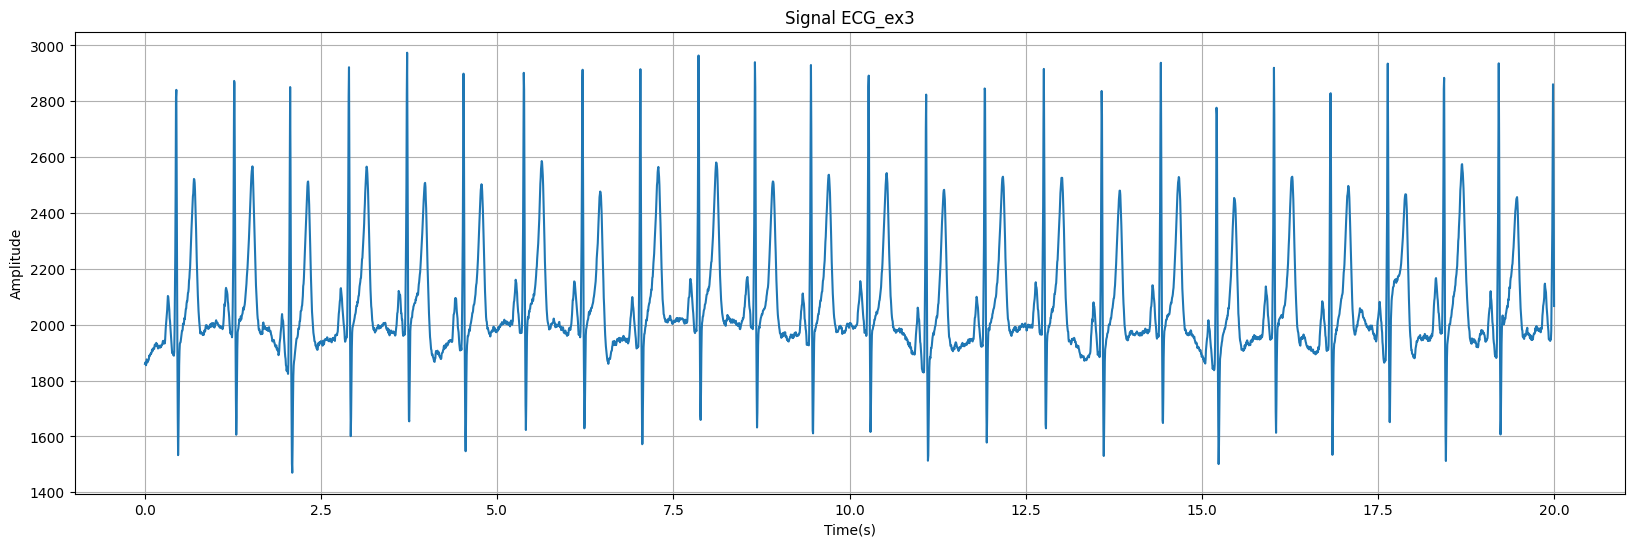

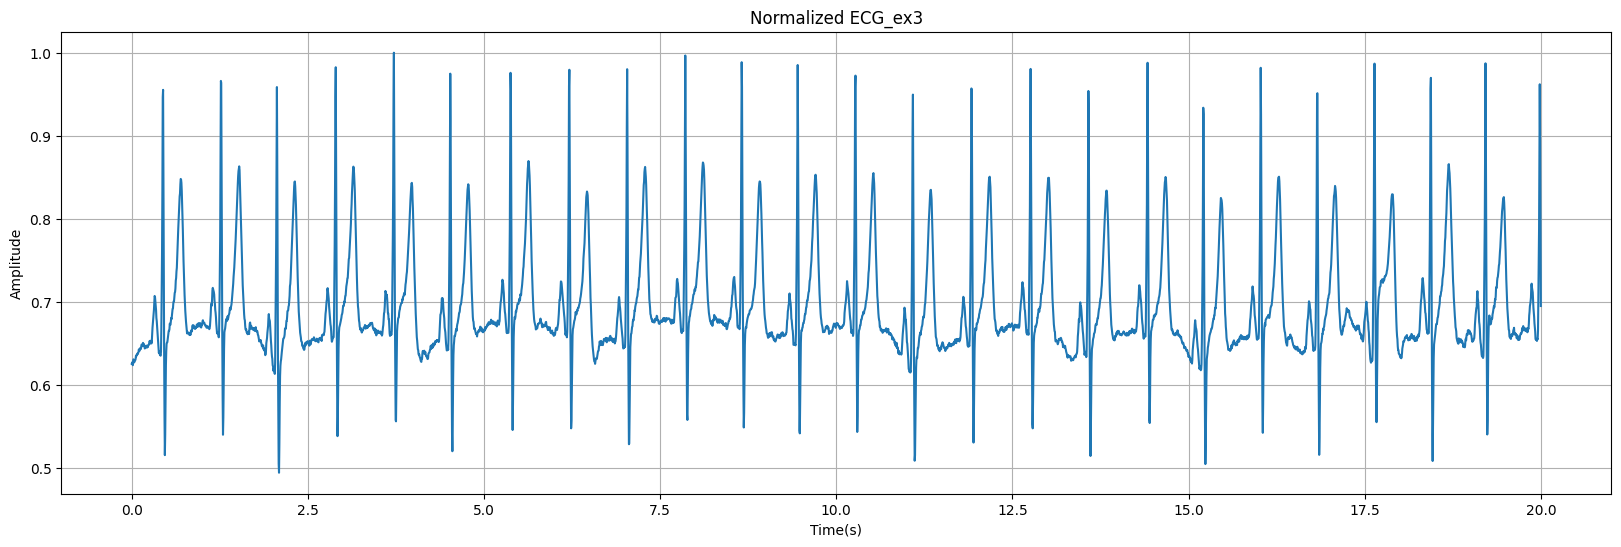

In [5]:
# Step 1: Load and plot EXG_ex3 Signal
path = pjoin('gdrive', 'MyDrive','ColabNotebooks')
filename = 'ECG_ex3.mat'

ECG_signal3 = scipy.io.loadmat(pjoin(path, filename), mdict=None, appendmat=True)

ECG_data3 = ECG_signal3['ECG']
ECG_signal3 = ECG_data3.astype(dtype=np.float64, order='K', casting='unsafe', subok=True, copy=True)
ECG_signal3 = ECG_signal3.flatten()

Fs = 200

def plot_signal(time_axis, amplitude_axis, title):
  plt.figure(figsize=(20, 6))
  plt.plot(time_axis, amplitude_axis)
  plt.xlabel('Time(s)')
  plt.ylabel('Amplitude')
  plt.title(title)
  plt.grid(True)
  plt.show()

ECG_signal3_x = np.linspace(0,len(ECG_signal3)/Fs,len(ECG_signal3))
plot_signal(ECG_signal3_x, ECG_signal3, 'Signal ECG_ex3')

# Step 2: Normalize signal
ECG_signal3_norm = ECG_signal3/abs(max(ECG_signal3))
plot_signal(ECG_signal3_x, ECG_signal3_norm, 'Normalized ECG_ex3')

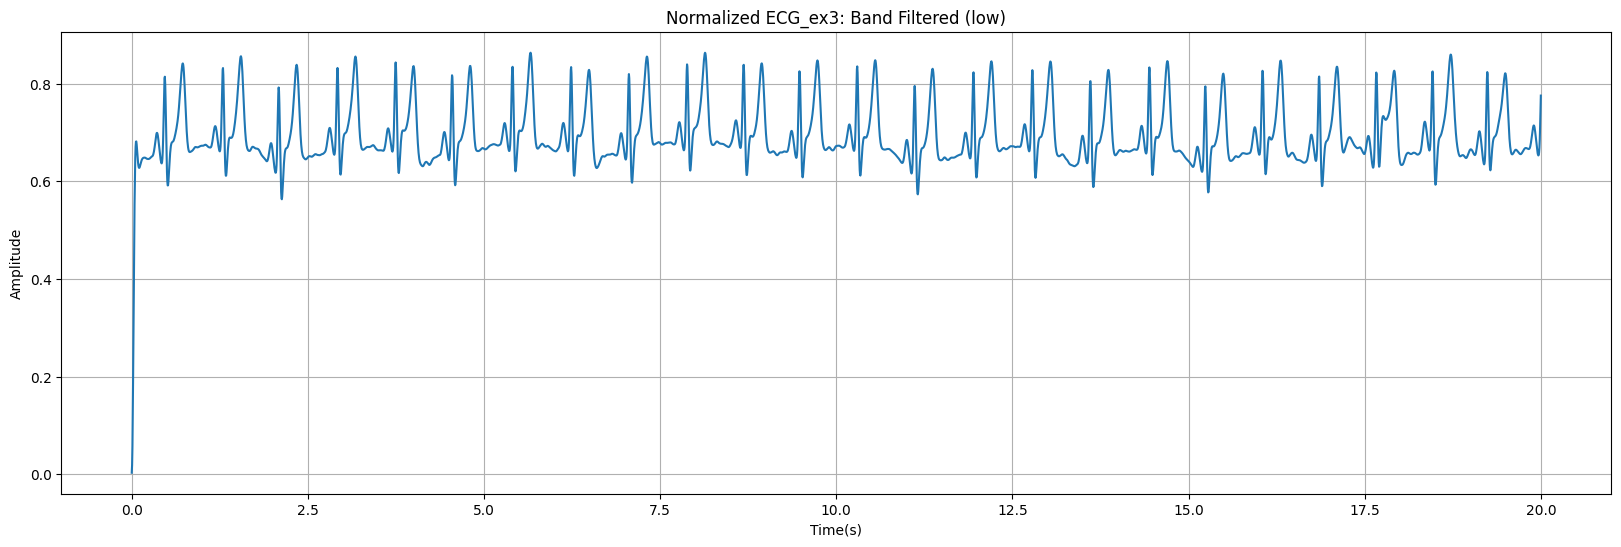

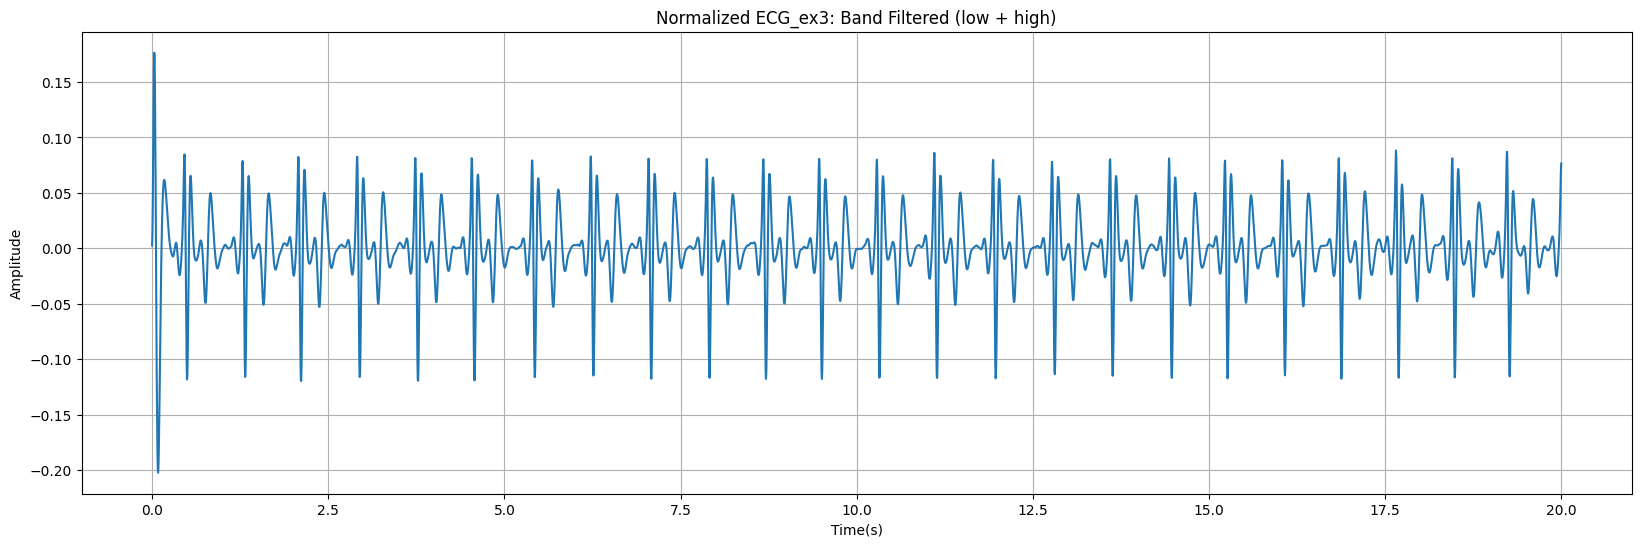

In [6]:
# Step 3: Band filter:

b_low, a_low = scipy.signal.butter(3, 12, btype='lowpass', fs=Fs)
b_high, a_high = scipy.signal.butter(3, 5, btype='highpass', fs=Fs)

signal3_norm_band_filtered = scipy.signal.lfilter(b_low, a_low, ECG_signal3_norm)
plot_signal(ECG_signal3_x, signal3_norm_band_filtered, 'Normalized ECG_ex3: Band Filtered (low)')

signal3_norm_band_filtered = scipy.signal.lfilter(b_high, a_high, signal3_norm_band_filtered)
plot_signal(ECG_signal3_x, signal3_norm_band_filtered, 'Normalized ECG_ex3: Band Filtered (low + high)')

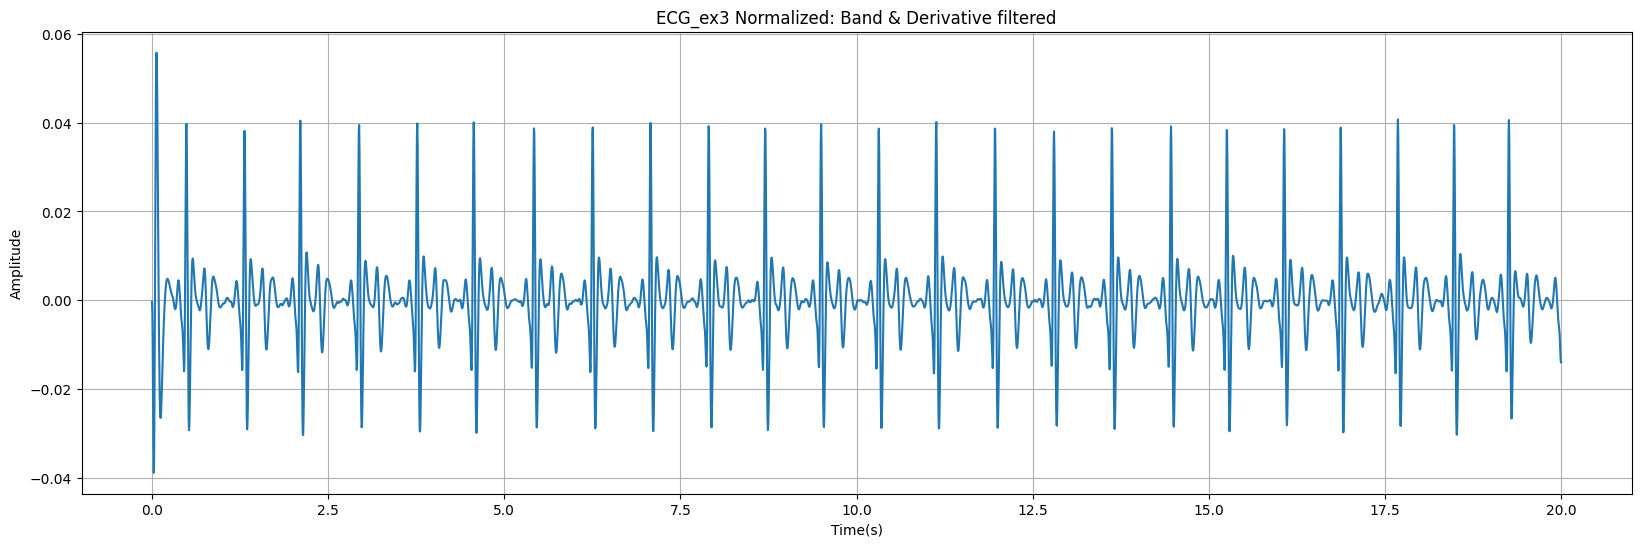

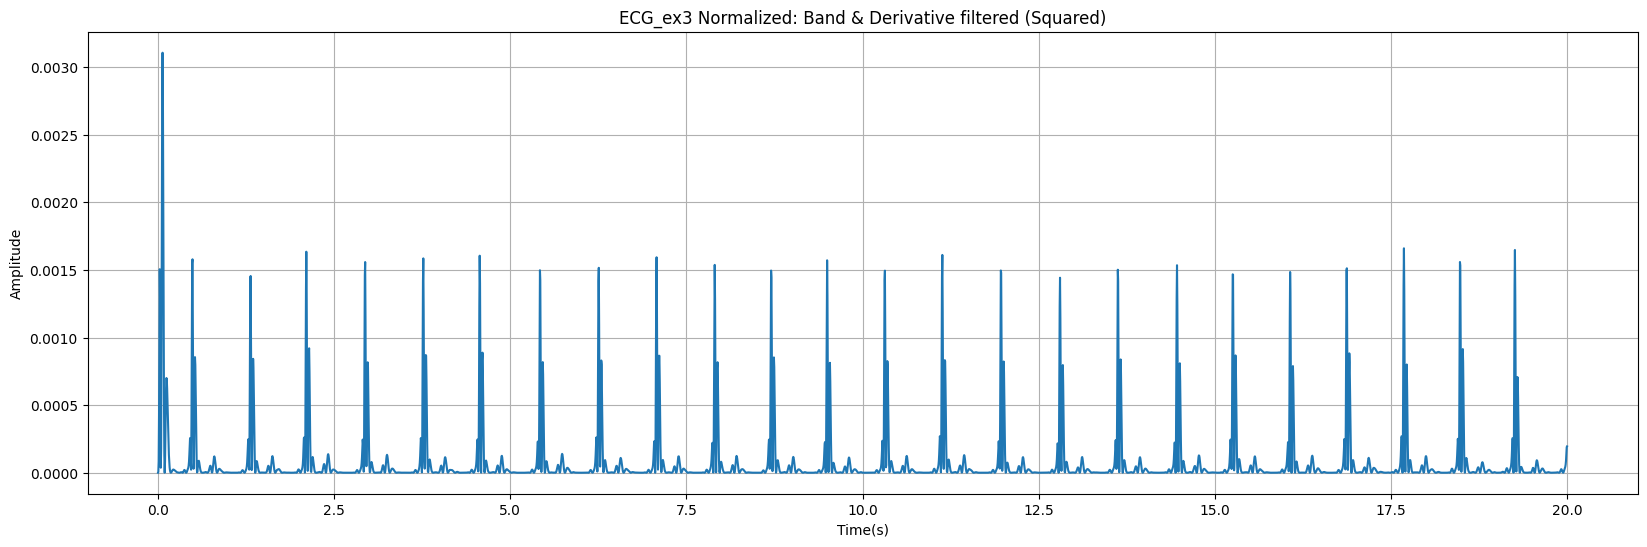

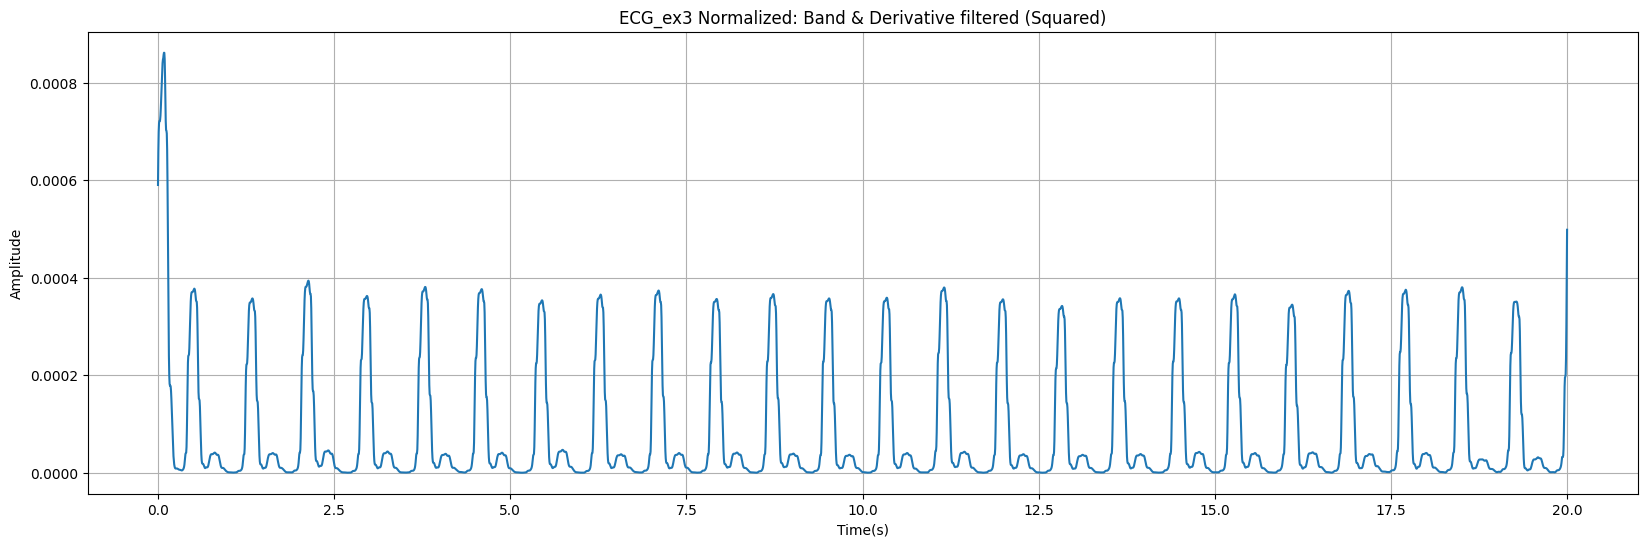

In [7]:
# Step 4: Derivative filter
b = np.array([-1, -2, 0, 2, 1]) / 8
a = 1

signal3_norm_derivative_filtered = scipy.signal.lfilter(b, a, signal3_norm_band_filtered)
plot_signal(ECG_signal3_x, signal3_norm_derivative_filtered, 'ECG_ex3 Normalized: Band & Derivative filtered')

# Step 5: Perform Squaring
signal3_norm_filtered_squared = signal3_norm_derivative_filtered**2
plot_signal(ECG_signal3_x, signal3_norm_filtered_squared, 'ECG_ex3 Normalized: Band & Derivative filtered (Squared)')

# Step 6: 30 point moving average filter
ECG_signal3_filtered_final = moving_average_filter(signal3_norm_filtered_squared, 30)
plot_signal(ECG_signal3_x, ECG_signal3_filtered_final, 'ECG_ex3 Normalized: Band & Derivative filtered (Squared)')

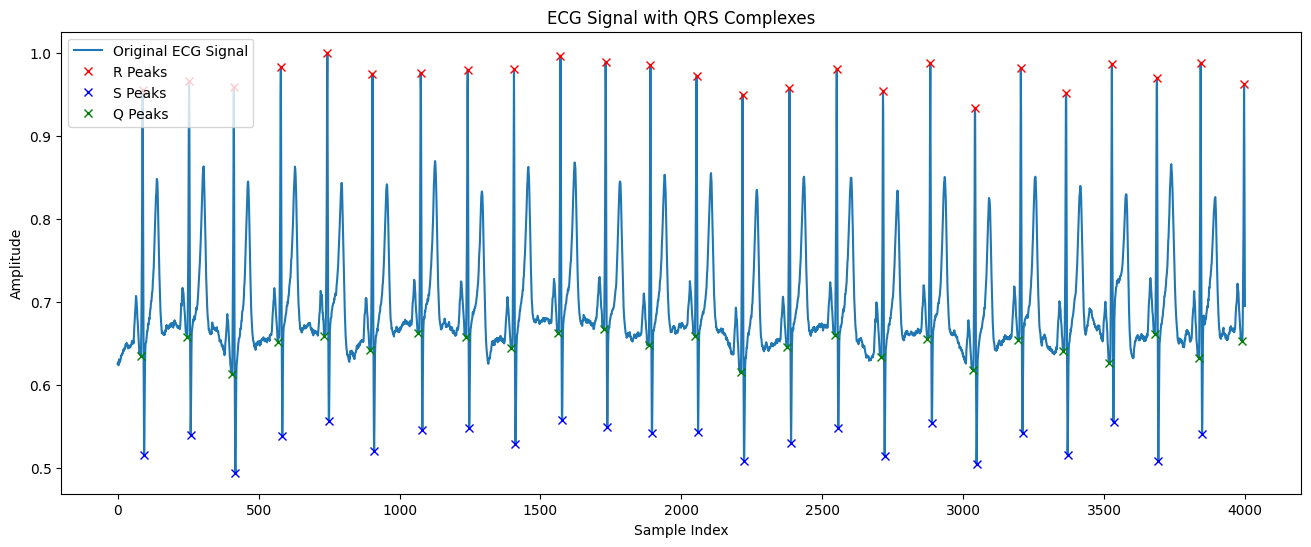

In [9]:
# R peaks
r_peaks = scipy.signal.find_peaks(ECG_signal3_norm, distance=150)[0]

# S peaks
s_peaks = scipy.signal.find_peaks(-ECG_signal3_norm, distance=150)[0]

# Q peaks
q_peaks = scipy.signal.find_peaks(-ECG_signal3_norm, prominence=(0.05, 0.3))[0]

q_peaks_correct = []
for r_peak in r_peaks:
  q_peaks_interval = []
  for q_peak in q_peaks:
    if q_peak < r_peak:
      q_peaks_interval.append(q_peak)
  q_peaks_correct.append(q_peaks_interval[-1])


plt.figure(figsize=(16, 6))
plt.plot(ECG_signal3_norm, label='Original ECG Signal')
plt.plot(r_peaks, ECG_signal3_norm[r_peaks], 'rx', label='R Peaks')
plt.plot(s_peaks, ECG_signal3_norm[s_peaks], 'bx', label='S Peaks')
plt.plot(q_peaks_correct, ECG_signal3_norm[q_peaks_correct], 'gx', label='Q Peaks')

plt.title('ECG Signal with QRS Complexes')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()

plt.show()

In [ ]:
rr_intervals = np.diff(r_peaks)/Fs
avg_rr_interval = np.average(rr_intervals)
heart_rate = 60/avg_rr_interval

print(f"heart_rate: {round(heart_rate, 2)} BPM")

heart_rate: 73.71 BPM


What is the Heart Rate?<br>
<font color=blue>Your answer here: The heart rate is 73.71 Beats Per Minute.
</font>